In [2]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
import torch
from tqdm import tqdm
import pandas as pd
import json
import numpy as np

In [11]:
torch.cuda.set_device(1)

In [2]:
tokenizer=BertTokenizer.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment')
model=BertForSequenceClassification.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment')

In [3]:
text='今天心情不好'

output=model(torch.tensor([tokenizer.encode(text)]))
print(torch.nn.functional.softmax(output.logits,dim=-1))

tensor([[0.9551, 0.0449]], grad_fn=<SoftmaxBackward0>)


In [5]:
ta = pd.read_excel('Tourist_Attraction.xlsx')

In [6]:
ta.head(2)

,相关地点数量,微博id,微博主页,文本,日期,图片,转发数,评论数,点赞数,地点,FID,经度,纬度
0,1.0,想做一個小朋友n_,https://weibo.com/1963539801?refer_flag=100103...,#第五届中国天津国际直升机博览会# 冒雨看飞行表演，大部分都是刚参见完70周年，看完更爱我的...,2019年10月13日 16:54,75093d59ly1g7wmzauecjj20u012dgun.jpg 75093d59l...,0.0,2.0,0.0,爱飞客,59871.0,117.444581,39.109729
1,1.0,鬼鬼滴答滴,https://weibo.com/1652859077?refer_flag=100103...,#天津国际直升机博览会# 大饱眼福，不虚此行 2天津·爱飞客(天津)航空俱乐部有限公司,2019年10月13日 16:26,6284a0c5ly1g7wmtg7nguj20u00u0wko.jpg 6284a0c5l...,0.0,2.0,2.0,爱飞客,59871.0,117.444581,39.109729


In [8]:
texts = ta.文本

In [14]:
model = model.cuda()

In [ ]:
sentiment = []
with torch.no_grad():
    for i, t in tqdm(enumerate(texts.items()), total=len(texts), ncols=50):
        the_text = t[1]
        
        # for text in the_text.split():
        output = model(torch.tensor([tokenizer.encode(the_text)]).cuda())
        predicts = torch.nn.functional.softmax(output.logits,dim=-1).cpu().numpy()
        sentiment.append([i, predicts[0]])

In [46]:
with open('sentiment.json', 'w') as f:
    json.dump([[i, p.tolist()] for i, p in sentiment], f)

In [49]:
np_se = np.array([p for i, p in sentiment])

In [50]:
import matplotlib.pyplot as plt

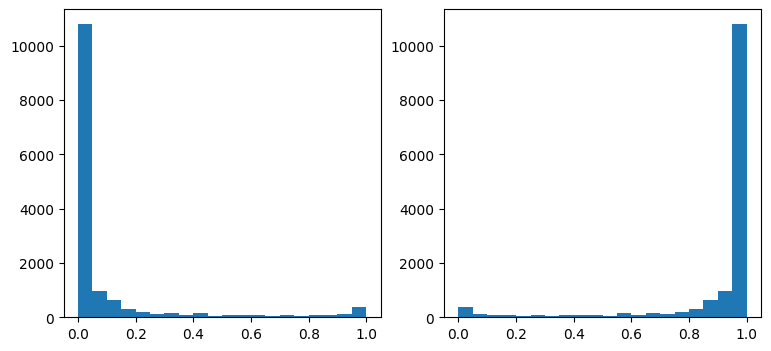

In [56]:
plt.figure(figsize=(9, 4))

plt.subplot(1,2,1)
_ = plt.hist(np_se[:,0], bins=20)

plt.subplot(1,2,2)
_ = plt.hist(np_se[:,1], bins=20)
# plt.scatter(np_se[:,0], np_se[:,1])

In [22]:
t = '#第五届中国天津国际直升机博览会# 冒雨看飞行表演，大部分都是刚参见完70周年，看完更爱我的祖国 2天津·爱飞客(天津)航空俱乐部有限公司'
t.split()

['#第五届中国天津国际直升机博览会#', '冒雨看飞行表演，大部分都是刚参见完70周年，看完更爱我的祖国', '2天津·爱飞客(天津)航空俱乐部有限公司']

In [25]:
from transformers import AutoModelForSequenceClassification


In [ ]:
tokenizer = BertTokenizer.from_pretrained('IDEA-CCNL/Erlangshen-MegatronBert-1.3B-Sentiment')
model = AutoModelForSequenceClassification.from_pretrained('IDEA-CCNL/Erlangshen-MegatronBert-1.3B-Sentiment')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment')
model = BertForSequenceClassification.from_pretrained('IDEA-CCNL/Erlangshen-Roberta-330M-Sentiment')

In [3]:
with open('sentiment.json', 'r') as f:
    sents = json.load(f)

In [9]:
sents_p = np.array([p for i, p in sents])

In [12]:
pd.Series(sents_p[:, 0])

0        0.319660
1        0.014750
2        0.824251
3        0.233719
4        0.257978
           ...   
14500    0.013328
14501    0.001435
14502    0.002241
14503    0.001694
14504    0.003835
Length: 14505, dtype: float64

In [13]:
ta.insert(ta.shape[1], '正面概率', pd.Series(sents_p[:, 0]))

(15309, 13)

In [20]:
real_ta = ta[:14505]

In [21]:
real_ta.insert(real_ta.shape[1], '正面概率', pd.Series(sents_p[:, 1]))

In [22]:
real_ta.insert(real_ta.shape[1], '负面概率', pd.Series(sents_p[:, 0]))

In [27]:
real_ta.to_excel('Tourist_Attraction_sent.xlsx')